# Quiz 2 - Model Comparisons
Wyatt Blair

DUE: 5/5/2024

In [2]:
import matplotlib.pyplot as plt
import torch
import os
import numpy as np
import pandas as pd
import random

from data import get_data
from util import plot_data, plot_metrics

/Users/wyatthenryblair/Desktop/Projects/Stevens/CS-583/Quiz2/data.py:39: UserWarning: Casting complex values to real discards the imaginary part (Triggered internally at /Users/runner/miniforge3/conda-bld/pytorch-recipe_1690825989322/work/aten/src/ATen/native/Copy.cpp:276.)
  y_seq = FloatTensor(self.dataset['POINTS'][i : i+self.sequence_length].values)


In [3]:
torch.manual_seed(0)
np.random.seed(0)
random.seed(0)

In [4]:
try:
    os.remove('./model_scores.csv')
except FileNotFoundError:
    pass

___
## **Data**: IPG2211A2N

I opted for a dataset on Kaggle which tracks electricity production from 1984 through 2017. This demonstrates several long term trends overlayed on top of the seasonal changes of electricity demand. The dataset was tagged as being "clean" and so it sounded like a good fit for my purposes.

Link to dataset: https://www.kaggle.com/datasets/shenba/time-series-datasets?resource=download

In [5]:
data = get_data()

In [6]:
data['data'].head(5)

,POINTS
DATE,
1/1/1985,72.5052
2/1/1985,70.6720
3/1/1985,62.4502
4/1/1985,57.4714
5/1/1985,55.3151


In [7]:
data['norm_data'].head(5)

,POINTS,DATE-INDEX
DATE,,
1/1/1985,0.232017,0
2/1/1985,0.207274,1
3/1/1985,0.096304,2
4/1/1985,0.029104,3
5/1/1985,0.000000,4


In [8]:
data['fft_data'].head(5)

,POINTS,DATE-INDEX
DATE,,
1/1/1985,179.677409+0.000000j,0
2/1/1985,-12.096601+39.438896j,1
3/1/1985,-2.595846+15.986933j,2
4/1/1985,-1.246447+12.104739j,3
5/1/1985,-1.6235730+9.8547600j,4


I googled IPG2211A2N and it led me down a rabbit hole. 

This dataset is tracking the Industrial Production: Utilities: Electric and Gas Utilities index which is stored in the database: FRED (Federal Reserve Economic Data). 

This database is maintained by the Research division of the Federal Reserve Bank of St. Louis that has more than 816,000 economic time series from various sources.

The index defines the unit as "Points" and provides no further explanation. For convenience's sake I'm going to rename the column to "Points".

**Sources**:
* [IPG2211A2N Index](https://www.tradingview.com/symbols/FRED-IPG2211A2N/)
* [FRED Wikipedia](https://en.wikipedia.org/wiki/Federal_Reserve_Economic_Data)

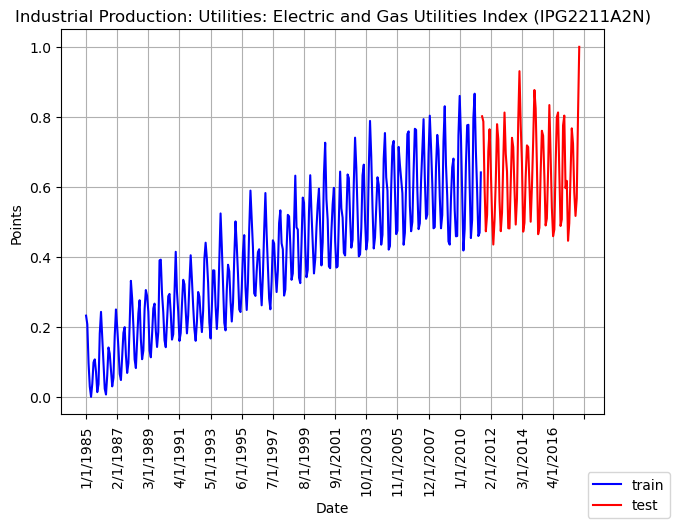

In [7]:
fig, ax = plt.subplots(1,1, figsize=(7, 5))
plot_data(ax)

fig.legend(loc='lower right')
plt.show()

___
## Model Implementations

* [Feed-Forward Neural Network](models/fnn.ipynb)
* [Convolutional Neural Network](models/cnn.ipynb)
* [Recurrent Neural Network](models/rnn.ipynb)
* [Long-Short Term Memory Autoencoder](models/autoencoder.ipynb)
* [Generative Adversarial Network](models/gan.ipynb)
* [Transformer](models/transformer.ipynb)
___
## Model Evaluation

Training FNN:   0%|          | 0/200 [00:00<?, ?it/s]

R2-Scores: 
--> TRAIN: 0.54600
--> TEST : -3.71876
--> FULL : 0.30499
MSE-Scores: 
--> TRAIN: 0.01755
--> TEST : 0.07964
--> FULL : 0.02990


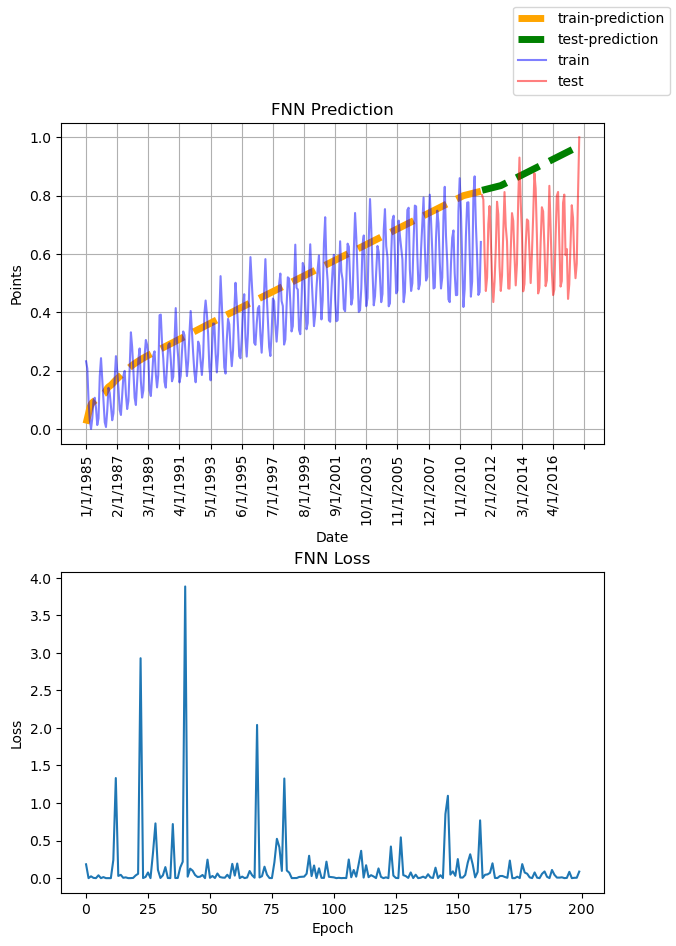

In [8]:
%run ./models/fnn.ipynb

Training CNN:   0%|          | 0/100 [00:00<?, ?it/s]

R2-Scores: 
--> TRAIN: 0.72591
--> TEST : -0.77136
--> FULL : 0.66451
MSE-Scores: 
--> TRAIN: 0.01059
--> TEST : 0.02990
--> FULL : 0.01444


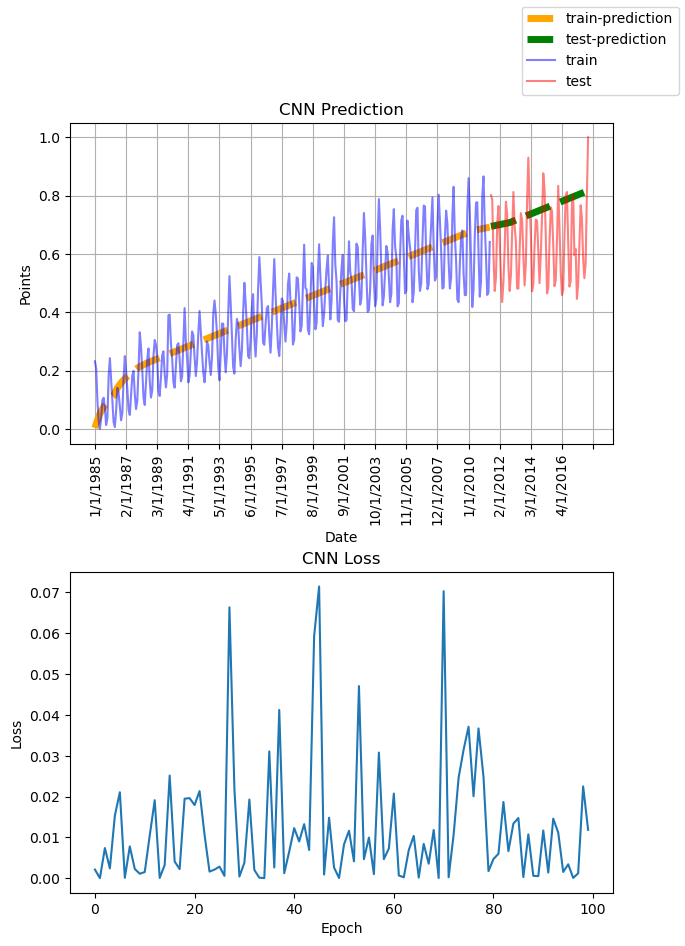

In [9]:
%run ./models/cnn.ipynb

Training RNN:   0%|          | 0/200 [00:00<?, ?it/s]

R2-Scores: 
--> TRAIN: 0.73188
--> TEST : 0.00344
--> FULL : 0.72927
MSE-Scores: 
--> TRAIN: 0.01036
--> TEST : 0.01682
--> FULL : 0.01165


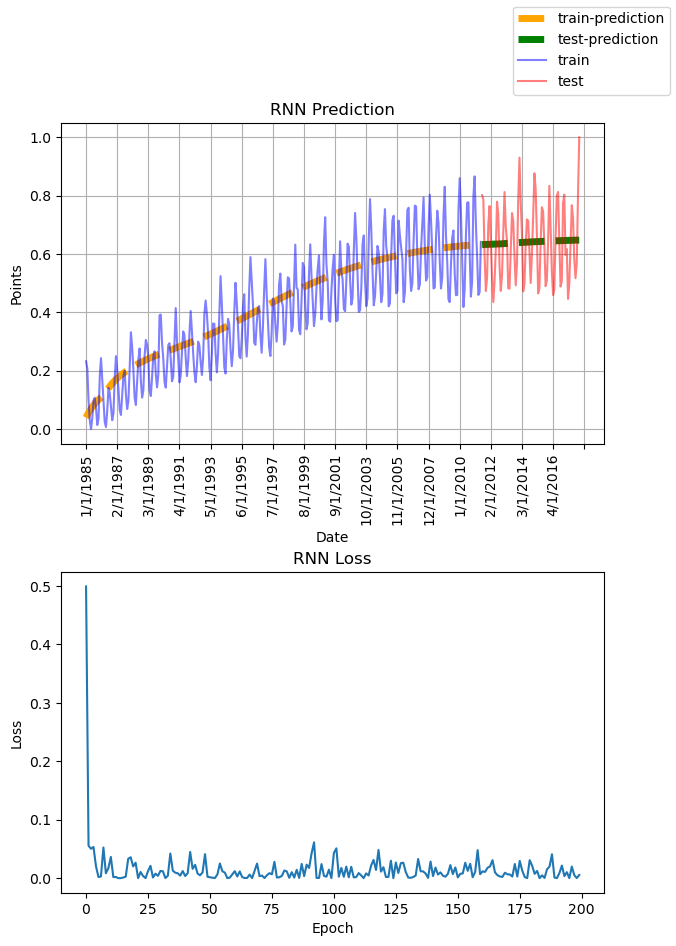

In [10]:
%run ./models/rnn.ipynb

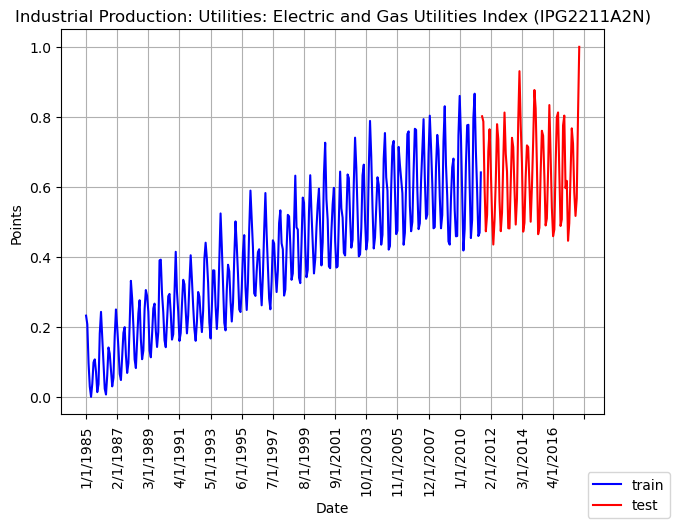

Training LSTMAutoencoder:   0%|          | 0/100 [00:00<?, ?it/s]

R2-Scores: 
--> TRAIN: 0.73178
--> TEST : -0.00383
--> FULL : 0.72864
MSE-Scores: 
--> TRAIN: 0.01037
--> TEST : 0.01694
--> FULL : 0.01168


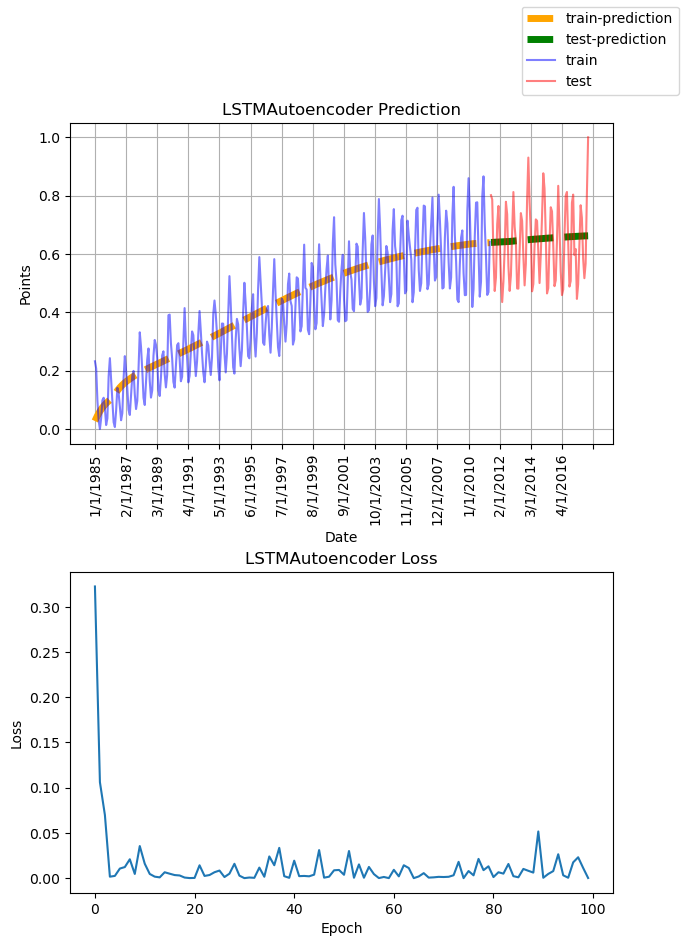

In [11]:
%run ./models/autoencoder.ipynb

Training GAN:   0%|          | 0/100 [00:00<?, ?it/s]

R2-Scores: 
--> TRAIN: -0.00155
--> TEST : -3.40577
--> FULL : -0.06460
MSE-Scores: 
--> TRAIN: 0.03871
--> TEST : 0.07436
--> FULL : 0.04581


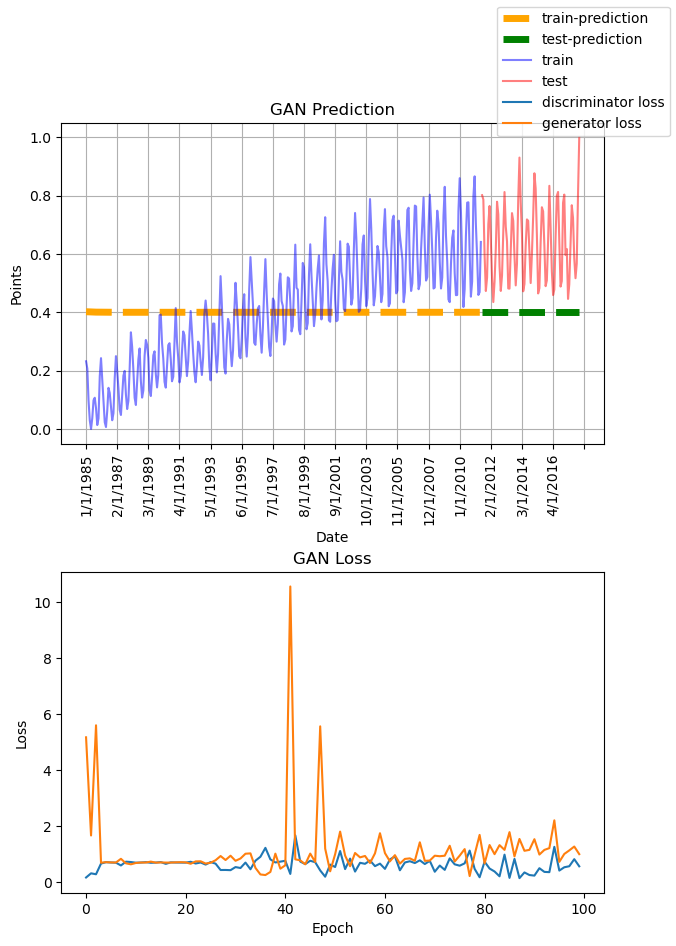

In [12]:
%run ./models/gan.ipynb

Training Transformer:   0%|          | 0/200 [00:00<?, ?it/s]

R2-Scores: 
--> TRAIN: 0.67896
--> TEST : -0.12476
--> FULL : 0.68119
MSE-Scores: 
--> TRAIN: 0.01241
--> TEST : 0.01898
--> FULL : 0.01372


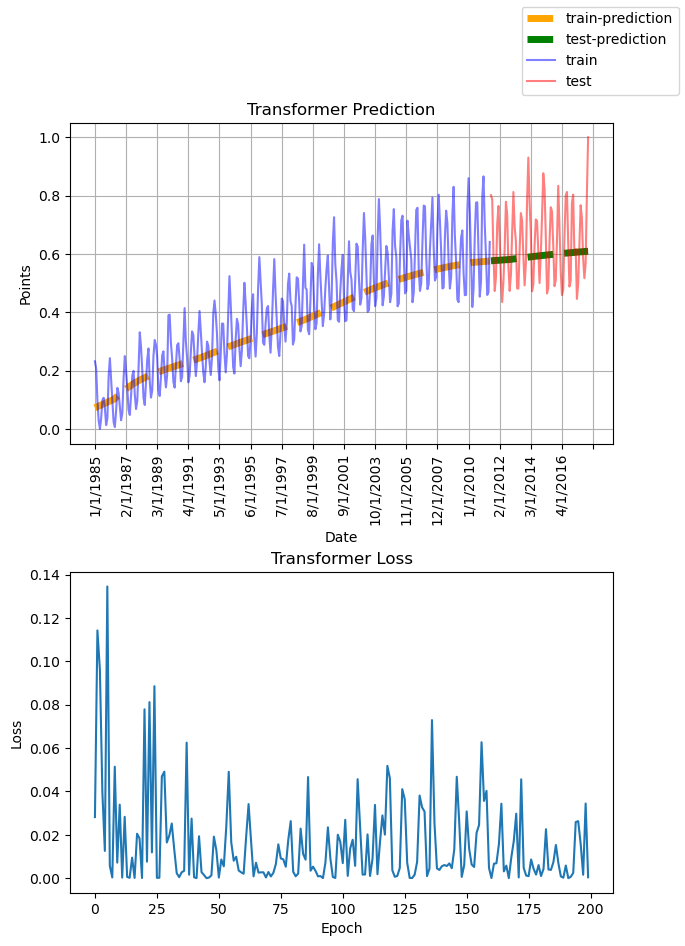

In [13]:
%run ./models/transformer.ipynb

___
## Compare by metric

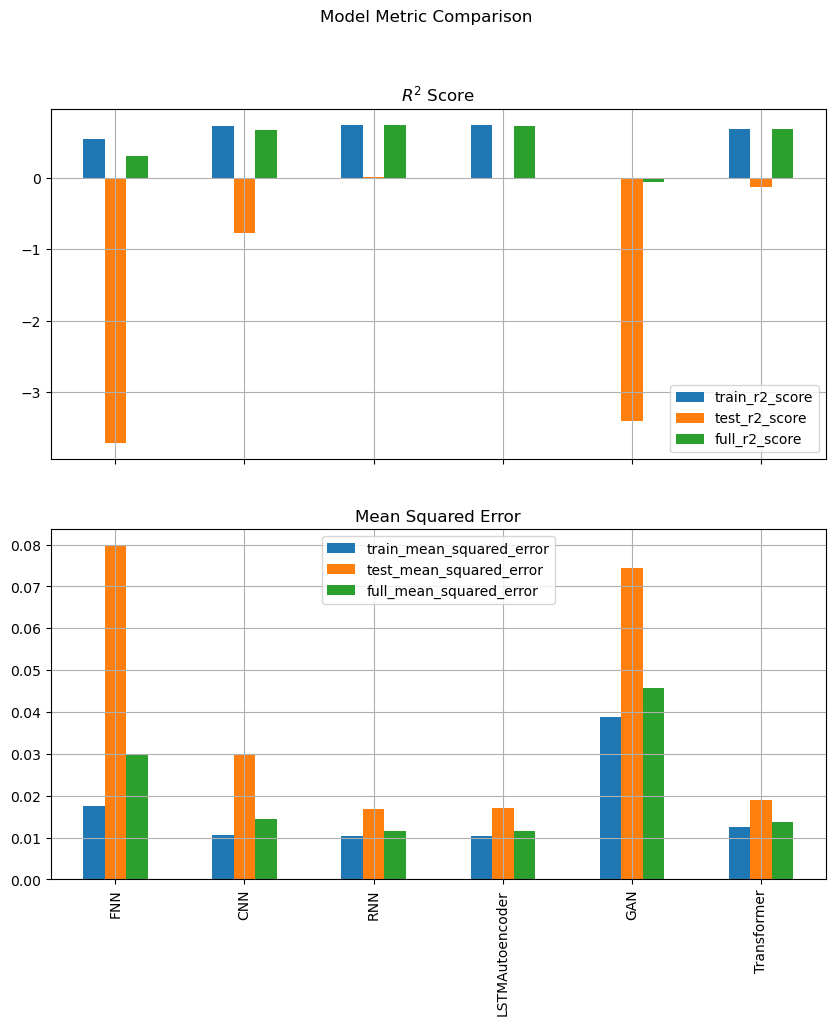

In [14]:
plot_metrics()

___
## Please see the "[CS583_Quiz2_WyattBlair_FinalModelConclusions.md](./CS583_Quiz2_WyattBlair_FinalModelConclusions.md)" file for the final analysis of the models